In [1]:
# EE559 HW 1
# Author : Creed Wallace Reilly
# Date: 05/31/2021

In [2]:
# Package Initialization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Question 1 - KNN

# Define sample array & input
sample_heights = np.array([150,155,165,190])
knn = 3;

# sample_heights = np.array([171,168,191,182,150,178]) 
# knn = 1; # Debugging - if I input heights and put k = 1, I should get weight exactly...

d = {'Person': [1,2,3,4,5,6], 'Height':[171,168,191,182,150,178], 'Weight':[80,78,100,80,65,83]} # height in cm, weight in kg
q1DF = pd.DataFrame(data=d) # create DataFrame for training data
print(q1DF) # print for verification that data input is correct

print('\nTest Pairs, KNN = ', knn, '\n')

# Calculate KNN for each sample
l = len(q1DF['Height']) # define length of the training DataFrame
k = np.arange(knn); # define k closest neighbors we want to use
increment = np.arange(len(sample_heights)) # create array for array index for for loop below
weight_est = np.zeros(len(sample_heights)) # create array to capture weight estimates

for i in increment: # for loop for all samples
    neighbors = np.array(abs(q1DF['Height']-sample_heights[i]).sort_values())
    y = 0 # define scalar sum for y1+...+yk, reinitialize for each sample
    
    for j in k: # find the k closest neighbors
        y = y + float(q1DF.loc[abs(q1DF['Height']-sample_heights[i]) == neighbors[j]]['Weight']) # calculate sum(y1...yk)
        
    weight_est[i] = y/len(k) # calculate the estimated weight for each sample height
    print('[', sample_heights[i], ' cm , ', round(weight_est[i],2), ' kg]')

   Person  Height  Weight
0       1     171      80
1       2     168      78
2       3     191     100
3       4     182      80
4       5     150      65
5       6     178      83

Test Pairs, KNN =  3 

[ 150  cm ,  74.33  kg]
[ 155  cm ,  74.33  kg]
[ 165  cm ,  80.33  kg]
[ 190  cm ,  87.67  kg]


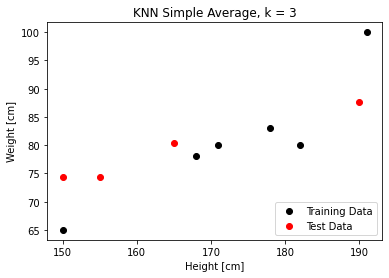

In [4]:
# Question 1 - Plotting the Data

x = np.array(q1DF['Height'])
y = np.array(q1DF['Weight'])
plt.scatter(x,y,c='black')

plt.scatter(sample_heights,weight_est,c='red');
title = 'KNN Simple Average, k = ' + str(knn) 
plt.title(title); # Define plot title
plt.xlabel('Height [cm]'); # X Axis label
plt.ylabel('Weight [cm]'); # Y Axis label
plt.legend(['Training Data','Test Data'],loc='lower right'); # Legend label & coloring


In [12]:
# Question 2 - Weighted KNN

# Using same dataframe, test points and KNN value from previous question

# Calculate KNN for each sample
l = len(q1DF['Height']) # define length of the training DataFrame
k = np.arange(knn); # define k closest neighbors we want to use
increment = np.arange(len(sample_heights)) # create array for array index for for loop below
weight_est = np.zeros(len(sample_heights)) # create array to capture weight estimates

for i in increment: # for loop for all samples
    neighbors = np.array(abs(q1DF['Height']-sample_heights[i]).sort_values())
    y = 0 # define scalar sum for y1+...+yk, reinitialize for each sample
    w = 0 # define scalar sum for w1+...+wk, reinitialize for each sample
    
    for j in k: # find the k closest neighbors
        y = y + (1/neighbors[j])*float(q1DF.loc[abs(q1DF['Height']-sample_heights[i]) == neighbors[j]]['Weight']) # calculate sum(y1...yk)
        w = w + (1/neighbors[j]) # calculate sum(w1...wk)
        
    weight_est[i] = y/w # calculate the estimated weight for each sample height
    print('[', sample_heights[i], ' cm , ', round(weight_est[i],2), ' kg]')

[ 150  cm ,  nan  kg]
[ 155  cm ,  70.71  kg]
[ 165  cm ,  79.24  kg]
[ 190  cm ,  96.76  kg]


<ipython-input-12-457a63571079>:17: RuntimeWarning: divide by zero encountered in longlong_scalars
  y = y + (1/neighbors[j])*float(q1DF.loc[abs(q1DF['Height']-sample_heights[i]) == neighbors[j]]['Weight']) # calculate sum(y1...yk)
<ipython-input-12-457a63571079>:18: RuntimeWarning: divide by zero encountered in longlong_scalars
  w = w + (1/neighbors[j]) # calculate sum(w1...wk)
<ipython-input-12-457a63571079>:20: RuntimeWarning: invalid value encountered in double_scalars
  weight_est[i] = y/w # calculate the estimated weight for each sample height


In [13]:
# Question 7 Vertebral Column Data Set

In [14]:
# Part A - Dowload the data set

# This was completed; data is stored in '../data' folder